In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [79]:
ruta_checkins = '../EDA/DATASETS/processed_checkins_final.csv'

In [99]:
df_business = pd.read_csv('processed_business_final.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'processed_business_final.csv'

In [80]:
# Open file checkin
df_checkin = pd.read_csv(ruta_checkins)
df_checkin.head()

business_id                                               date  \
0  ---kPU91CF4Lq2-WlRu9Lw  ['2020-03-13 21:10:56', '2020-06-02 22:18:06',...   
1  --LC8cIrALInl2vyo701tg  ['2017-01-12 19:10:02', '2017-05-11 23:21:03',...   
2  --pDYWb4DzqKdAdrPcxuaA  ['2013-03-25 19:29:51', '2013-05-31 23:45:58',...   
3  --rS-rnOIZxoiDA8yctWpQ  ['2021-08-21 15:16:06', '2021-08-30 01:04:13',...   
4  -0EdehHjIQc0DtYU8QcAig  ['2013-11-17 12:32:05', '2015-04-09 22:37:03',...   

   count  
0     11  
1      7  
2     35  
3     14  
4     14

Convertir la fecha a un formato de solo fechas sin horas

In [81]:
df_checkin.columns

Index(['business_id', 'date', 'count'], dtype='object')

In [82]:
def parse_date(date_str):
    return datetime.strptime(date_str.strip(), '%Y-%m-%d %H:%M:%S')

df_checkin['date'] = df_checkin['date'].str.split(',')
df_checkin = df_checkin.explode('date', ignore_index=True)

df_checkin.head()

business_id                    date  count
0  ---kPU91CF4Lq2-WlRu9Lw  ['2020-03-13 21:10:56'     11
1  ---kPU91CF4Lq2-WlRu9Lw   '2020-06-02 22:18:06'     11
2  ---kPU91CF4Lq2-WlRu9Lw   '2020-07-24 22:42:27'     11
3  ---kPU91CF4Lq2-WlRu9Lw   '2020-10-24 21:36:13'     11
4  ---kPU91CF4Lq2-WlRu9Lw   '2020-12-09 21:23:33'     11

In [87]:
df_checkin['date'] = pd.to_datetime(df_checkin['date'], errors='coerce')


C:\Users\Dell\AppData\Local\Temp\ipykernel_6948\4187590457.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_checkin['date'] = pd.to_datetime(df_checkin['date'], errors='coerce')


In [90]:
df_checkin = df_checkin.dropna(subset=['date'])  # Drop rows with NaT in 'date' column


In [91]:
df_checkin["date"].unique()

<DatetimeArray>
['2020-06-02 22:18:06', '2020-07-24 22:42:27', '2020-10-24 21:36:13',
 '2020-12-09 21:23:33', '2021-01-20 17:34:57', '2021-04-30 21:02:03',
 '2021-05-25 21:16:54', '2021-08-06 21:08:08', '2021-10-02 15:15:42',
 '2017-05-11 23:21:03',
 ...
 '2015-08-20 00:12:02', '2015-09-10 00:08:45', '2015-09-11 00:01:08',
 '2015-09-16 00:03:19', '2015-09-17 00:00:04', '2015-10-08 00:25:57',
 '2016-02-19 23:31:08', '2017-03-22 00:05:14', '2017-04-26 23:09:56',
 '2019-12-22 07:50:54']
Length: 937665, dtype: datetime64[ns]

In [92]:
df_checkin['mes'] = df_checkin['date'].dt.month

In [93]:
df_checkin["year"] = df_checkin["date"].dt.year

In [94]:
df_checkin["trim"] = df_checkin["date"].dt.quarter

In [ ]:
df_checkin['crecimiento_mensual_checkins'] = df_checkin['business_id'].groupby(df_checkin['mes']).transform(lambda x: x.diff())

In [ ]:
df_checkin['crecimiento_mensual'] = (df_checkin['crecimiento_mensual_checkins'] / df_checkin['business_id'].groupby(df_checkin['mes']).transform(pd.Series.shift, 1)) * 100

In [ ]:
df_checkin['crecimiento_mensual'] = df_checkin['crecimiento_mensual'].fillna(df_checkin['crecimiento_mensual'].median())

In [ ]:
df_checkin['crecimiento_mensual_checkins'] = df_checkin['crecimiento_mensual_checkins'].fillna(df_checkin['crecimiento_mensual_checkins'].median())

In [ ]:
df_checkin

Unnamed: 0             business_id       date  mes  \
0           18769  -Ijm5ICZUZffTo3iumczrw 2015-04-26    4   
1           18770  -Ijm5ICZUZffTo3iumczrw 2015-05-01    5   
2           18771  -Ijm5ICZUZffTo3iumczrw 2015-05-23    5   
3           18772  -Ijm5ICZUZffTo3iumczrw 2015-09-08    9   
4           18773  -Ijm5ICZUZffTo3iumczrw 2015-10-29   10   
...           ...                     ...        ...  ...   
56521     3524327  zvlJoRJfViu-_dZflUn6Bw 2017-06-03    6   
56522     3524328  zvlJoRJfViu-_dZflUn6Bw 2020-08-13    8   
56523     3524329  zvlJoRJfViu-_dZflUn6Bw 2020-08-13    8   
56524     3524330  zvlJoRJfViu-_dZflUn6Bw 2021-03-28    3   
56525     3524331  zvlJoRJfViu-_dZflUn6Bw 2021-08-13    8   

       crecimiento_mensual_checkins  crecimiento_mensual  
0                               1.0             0.000088  
1                               1.0             0.000088  
2                               1.0             0.005328  
3                               1.0             0.000088  
4                               1.0             0.000088  
...                             ...                  ...  
56521                        4601.0             0.130720  
56522                        4592.0             0.130464  
56523                           1.0             0.000028  
56524                           9.0             0.000255  
56525                           2.0             0.000057  

[56526 rows x 6 columns]

In [ ]:
df_checkin.columns

Index(['Unnamed: 0', 'business_id', 'date', 'mes',
       'crecimiento_mensual_checkins', 'crecimiento_mensual'],
      dtype='object')

In [ ]:
df_checkin['trimestre'] = df_checkin['date'].dt.quarter

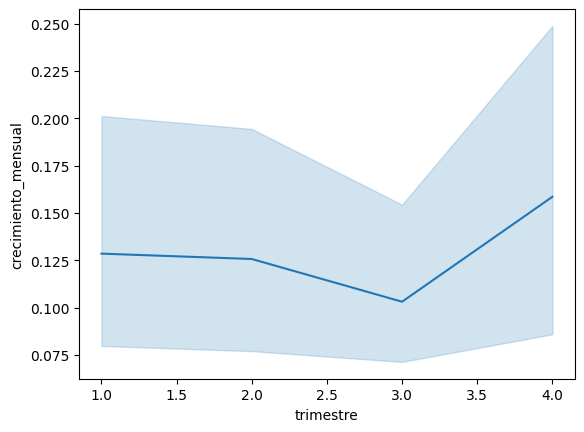

In [ ]:
sns.lineplot(x='trimestre', y='crecimiento_mensual', data=df_checkin)
plt.show()

In [ ]:
df_checkin.to_csv('checkins.csv')